# Santander costumer satisfaction solution

### Business Problem

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

### Proposed solution

In [1]:
# Packages
import pandas as pd

In [2]:
# Training dataset
trainDF = pd.read_csv('train.csv', index_col = 'ID')

In [3]:
# Training dataset shape
trainDF.shape

(76020, 370)

In [4]:
# First five rows of the traning dataset
trainDF.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
# Missing values
trainDF.isnull().sum().sum()

0

In [6]:
# Variable types
trainDF.dtypes

var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
imp_op_var39_comer_ult3    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 370, dtype: object

In [7]:
# Numeric columns
trainDF.select_dtypes(include = ['int', 'float']).shape

(76020, 370)

All columns are numeric type.

In [8]:
# Number of zeros by row
(trainDF == 0).sum(axis = 1)

ID
1         356
3         330
4         341
8         310
10        320
         ... 
151829    356
151830    325
151835    342
151836    341
151838    356
Length: 76020, dtype: int64

In [9]:
# Number of row that has less than 200 zeros by row
((trainDF == 0).sum(axis = 1) < 200).sum()

0

In [10]:
# Number of row that has less than 250 zeros by row
((trainDF == 0).sum(axis = 1) < 250).sum()

26

In [11]:
# Number of row that has less than 300 zeros by row
((trainDF == 0).sum(axis = 1) < 300).sum()

3162

Observation: Each row has at least 200 zeros. It allows to transform the rows in sparse vectors.

In [12]:
# Number of zeros by columns
(trainDF == 0).sum(axis = 0)

var3                          75
var15                          0
imp_ent_var16_ult1         72301
imp_op_var39_comer_ult1    66075
imp_op_var39_comer_ult3    64330
                           ...  
saldo_medio_var44_hace3    75988
saldo_medio_var44_ult1     75879
saldo_medio_var44_ult3     75879
var38                          0
TARGET                     73012
Length: 370, dtype: int64

In [13]:
# Number of columns that has only zeros
number_of_rows = 76020
((trainDF == 0).sum(axis = 0) == number_of_rows).sum()

34

34 columns have only zeros.

In [14]:
# The prove the 34 columns are composed only with zeros
trainDF.loc[:,((trainDF == 0).sum(axis = 0) == number_of_rows)].sum().sum()

0

In [15]:
# The dataset without the zero columns
trainDF_1 = trainDF.loc[:, False == ((trainDF == 0).sum(axis = 0) == number_of_rows)]

In [16]:
# Number of unique values in int columns
int_trainDF = trainDF_1.select_dtypes(include = 'int')
uniques = []

for i in range(len(int_trainDF.columns)):
    n_uniques = int_trainDF.iloc[:,i].drop_duplicates().count()
    uniques.append((int_trainDF.columns[i],n_uniques))

uniquesDF = pd.DataFrame(uniques, columns = ['Name', 'Unique_values'])
uniquesDF.groupby('Unique_values').count()

,Name
Unique_values,
2,104
3,24
4,15
5,9
6,4
7,7
8,4
9,11
10,1


In [17]:
# Change the max number of rows presented
pd.set_option('display.max_rows', None)
pd.options.display.max_rows

In [18]:
# Unique values and categorial countings
uniques = []

for i in range(len(trainDF_1.columns)):
    n_uniques = list(trainDF_1.iloc[:,i].drop_duplicates())
    if isinstance(n_uniques[0],int) and (len(n_uniques) <= 10):
        countings = trainDF_1.iloc[:,i].value_counts().values
        uniques.append((trainDF_1.columns[i], n_uniques, countings))

uniquesDF1 = pd.DataFrame(uniques, columns = ['Name', 'Unique_values', 'Count'])

uniquesDF1

,Name,Unique_values,Count
0,ind_var1_0,"[0, 1]","[75149, 871]"
1,ind_var1,"[0, 1]","[75734, 286]"
2,ind_var5_0,"[1, 0]","[72829, 3191]"
3,ind_var5,"[0, 1]","[50459, 25561]"
4,ind_var6_0,"[0, 1]","[76012, 8]"
5,ind_var6,"[0, 1]","[76018, 2]"
6,ind_var8_0,"[0, 1]","[73524, 2496]"
7,ind_var8,"[0, 1]","[73846, 2174]"
8,ind_var12_0,"[0, 1]","[70887, 5133]"
9,ind_var12,"[0, 1]","[72564, 3456]"


Almost all "int" variables seems to be categorical, expect some with big values.

The dataset has 76020 observations. As shown in the last table, some classes have high counting. Thus, it will be assumed that the classes greater than 75260 countings will be erased. It means that the other categorical values get 1% of the observations. It will be extended to the float variables. So, the classes of float variables with a great percentage of one values will be eliminated.

In [19]:
# Change the max number of rows presented to 60
pd.set_option('display.max_rows', 60)
pd.options.display.max_rows

60

In [20]:
# Dataset without rare observations - read the text above
# The Target variable will not be affected
trainDF_2 = pd.DataFrame(index = trainDF_1.index)

for i in range(len(trainDF_1.columns)):
    countings = trainDF_1.iloc[:,i].value_counts().values
    if (max(countings) < 75260):
        trainDF_2 = pd.concat([trainDF_2, trainDF_1.iloc[:,i]], axis=1, sort=False)

trainDF_2

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,300.0,122.22,300.0,240.75,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,67333.770000,0
8,2,37,0.0,195.0,195.0,195.0,195.0,0.0,0.0,195.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,60926.490000,0
151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15498.42,0.0,48175.62,31837.02,0.0,0.00,0.0,0.00,118634.520000,0
151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,74028.150000,0


The dataset was reduced from 370 variables to 149, but it still has a huge number of variables.

In [21]:
# Duplicated Obserations
trainDF_2[trainDF_2.duplicated()]

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
269,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
347,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
447,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
488,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
753,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151695,2,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
151712,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
151721,2,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


It shows 4807 duplicated observations.

In [22]:
# Duplicate extraction
trainDF_3 = trainDF_2[False == trainDF_2.duplicated()]
trainDF_3

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,39205.170000,0
3,2,34,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,300.0,122.22,300.0,240.75,49278.030000,0
4,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,67333.770000,0
8,2,37,0.0,195.00,195.00,195.00,195.00,0.0,0.0,195.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,64007.970000,0
10,2,39,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151825,2,39,0.0,375.99,405.33,375.99,405.33,1200.0,2010.0,1575.99,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,90214.170000,0
151829,2,48,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,60926.490000,0
151830,2,39,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,15498.42,0.0,48175.62,31837.02,0.0,0.00,0.0,0.00,118634.520000,0


In [23]:
# Descriptive statistics of the traning dataset
trainDF_3.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
count,71213.00000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,...,7.121300e+04,71213.000000,7.121300e+04,7.121300e+04,71213.000000,71213.000000,71213.000000,71213.000000,7.121300e+04,71213.000000
mean,-1499.77125,33.563142,92.027471,77.247699,127.598088,73.448321,120.688472,72.809105,120.867944,146.506886,...,4.266401e+03,654.932842,6.087477e+03,4.697751e+03,3885.087046,593.727567,5179.797833,4118.259955,1.171341e+05,0.039529
std,38733.75145,13.108427,1668.207086,350.042621,563.489653,329.699561,528.287454,549.251967,981.158810,719.934776,...,3.901239e+04,9599.861510,4.771184e+04,3.666697e+04,27216.775662,7419.605745,32919.498663,26400.945738,1.882276e+05,0.194852
min,-999999.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.00000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.587463e+04,0.000000
50%,2.00000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.002062e+05,0.000000
75%,2.00000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.228152e+05,0.000000
max,238.00000,105.000000,210000.000000,12888.030000,21024.810000,12888.030000,16566.810000,45990.000000,131100.000000,47598.090000,...,3.000538e+06,668335.320000,3.004186e+06,2.272859e+06,450000.000000,304838.700000,450000.000000,450000.000000,2.203474e+07,1.000000


The descriptive statistical parameter of the variables is very different.

In [24]:
# Package
from sklearn.preprocessing import MinMaxScaler

# Normalization
scaler = MinMaxScaler(feature_range = (0, 1))
trainDF_4 = scaler.fit_transform(trainDF_3)
trainDF_4

array([[9.99764056e-01, 1.80000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.54525995e-03, 0.00000000e+00],
       [9.99764056e-01, 2.90000000e-01, 0.00000000e+00, ...,
        5.35000000e-04, 2.00250254e-03, 0.00000000e+00],
       [9.99764056e-01, 1.80000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 2.82211618e-03, 0.00000000e+00],
       ...,
       [9.99764056e-01, 3.40000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 5.15083791e-03, 0.00000000e+00],
       [9.99764056e-01, 1.80000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 3.12599766e-03, 0.00000000e+00],
       [9.99764056e-01, 2.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 3.59128172e-03, 0.00000000e+00]])

In [25]:
# Rows and columns nomination
trainDF_4 = pd.DataFrame(trainDF_4[:,:-1], index = trainDF_3.index, columns = trainDF_3.iloc[:,:-1].columns)
trainDF_4

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
1,0.999764,0.18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01028,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001545
3,0.999764,0.29,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01028,0.000000,0.0,0.000000,0.000000,0.000667,0.000401,0.000667,0.000535,0.002003
4,0.999764,0.18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01028,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002822
8,0.999764,0.32,0.0,0.015130,0.009275,0.015130,0.011771,0.000000,0.000000,0.004097,...,0.01028,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002671
10,0.999764,0.34,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01028,0.000000,0.0,0.028461,0.037619,0.000000,0.000000,0.000000,0.000000,0.005091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151825,0.999764,0.34,0.0,0.029174,0.019279,0.029174,0.024466,0.026093,0.015332,0.033110,...,0.01028,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003861
151829,0.999764,0.43,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01028,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002531
151830,0.999764,0.34,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01028,0.005165,0.0,0.016036,0.014007,0.000000,0.000000,0.000000,0.000000,0.005151


In [26]:
# Descriptive statistics of the traning dataset
trainDF_4.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38
count,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,...,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000
mean,0.998263,0.285631,0.000438,0.005994,0.006069,0.005699,0.007285,0.001583,0.000922,0.003078,...,0.010935,0.001422,0.000980,0.002026,0.002067,0.008634,0.001948,0.011511,0.009152,0.005083
std,0.038725,0.131084,0.007944,0.027160,0.026801,0.025582,0.031888,0.011943,0.007484,0.015125,...,0.011143,0.013002,0.014364,0.015882,0.016133,0.060482,0.024339,0.073154,0.058669,0.008544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.999764,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002756
50%,0.999764,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004314
75%,0.999764,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005341
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Linear dimensionality reduction
from sklearn.decomposition import PCA

# The explained variance chosen was 99%. 
# It was chosen after some tests.
exp_var = 0.99
pca = PCA(n_components = exp_var)
pca.fit(trainDF_4)
pca_trainDF_5 = pca.transform(trainDF_4)

In [28]:
pca_trainDF_5.shape

(71213, 31)

In [29]:
# Dataframe function
def df(X, Y, ind):
    dataset = pd.DataFrame(X,\
             index = ind.index,\
             columns = ['V' + str(i) for i in range(1, X.shape[1] + 1)])
    dataset = pd.concat([dataset, Y], axis = 1)
    return dataset

In [30]:
# Dataframe of the reduced dataset
trainDF_5 = df(pca_trainDF_5, trainDF_3.iloc[:,-1], trainDF_4)
trainDF_5

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.256688,0.536415,0.021541,-0.447688,-0.045389,-0.134768,-0.055047,-0.036950,0.001354,0.049381,...,0.007650,0.010964,0.000110,0.000590,-0.004173,0.000417,0.001749,-0.001180,0.000185,0
3,-0.159958,-0.047107,1.806341,0.095184,-1.335989,0.226263,-0.162348,-0.183045,-0.064955,-0.058010,...,-0.439889,-0.277624,-0.058214,0.001189,0.011529,-0.010085,-0.011197,0.049081,-0.015082,0
4,-0.070382,-0.427495,-0.352687,-0.166632,-0.068442,0.085041,0.477880,0.455722,0.002469,-0.085374,...,0.008079,-0.011500,-0.002045,-0.001564,0.001266,-0.005027,0.002938,-0.003925,0.016220,0
8,1.578913,1.303288,-0.674461,0.053273,-0.647880,-0.859601,0.361189,-0.530662,-0.112065,-0.136100,...,-0.018903,0.035853,0.063968,0.008472,0.002911,-0.003007,-0.024087,-0.033343,-0.064924,0
10,0.394483,0.054678,1.311102,0.105027,1.711337,-0.862178,-0.235322,0.338096,0.424049,-0.038238,...,0.099365,-0.197104,-0.115348,-0.040892,0.093862,-0.017348,-0.097747,-0.146536,-0.016228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151825,0.680934,-0.355538,0.033961,-0.113258,0.337702,-0.069718,-0.921231,0.629252,0.564403,-0.040634,...,0.031367,-0.018673,-0.028169,-0.013394,0.025183,0.366013,-0.095983,0.092908,0.132452,0
151829,-1.251451,0.543808,0.042722,-0.443980,-0.045859,-0.143444,-0.059999,-0.036991,0.000502,0.046821,...,-0.023758,0.016716,-0.017048,0.007992,-0.016340,-0.001813,0.003571,0.000547,0.006728,0
151830,-0.102220,0.107523,1.301682,0.070830,1.520506,-0.687690,0.541740,-0.545149,-0.203428,-0.028132,...,0.050617,-0.079873,0.093310,-0.027481,0.078925,0.000131,-0.054075,-0.041647,-0.041543,0


In [31]:
# Variable types
trainDF_5.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
V29       float64
V30       float64
V31       float64
TARGET      int64
dtype: object

In [32]:
# Countings of the TARGET variable classes
trainDF_5.iloc[:,-1].value_counts()

0    68398
1     2815
Name: TARGET, dtype: int64

The classes must be balanced.

In [33]:
# Function to down-sample majority class
from sklearn.utils import resample

def down_major_class(dataset):
    # Class separation of the TARGET variable
    major_class = dataset[dataset.TARGET == 0]
    minor_class = dataset[dataset.TARGET == 1]

    # Downsample majority class
    reduced_major_class = resample(major_class, replace = False, n_samples = len(minor_class))

    # Combine minority class with downsampled majority class
    new_dataset = pd.concat([reduced_major_class, minor_class]).sort_index()
    
    return new_dataset

In [34]:
# Appling the down sample
trainDF_6 = down_major_class(trainDF_5)
trainDF_6

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
36,-1.526378,0.560386,-0.260441,1.065334,-0.089142,-0.192741,-0.055351,0.036897,0.021622,0.059564,...,-0.025960,0.028516,-0.008039,0.000749,-0.003287,0.001016,-0.000254,0.003357,-0.007318,0
77,-1.247681,0.549131,0.057972,-0.441310,-0.046197,-0.149691,-0.063564,-0.037020,-0.000111,0.044977,...,-0.046373,0.020857,-0.029402,0.013322,-0.025099,-0.003418,0.004881,0.001791,0.011440,1
135,0.565872,-0.461638,-0.045898,-0.125453,0.201441,-0.022934,-0.663563,0.380489,-0.334715,0.144117,...,0.003535,-0.005431,-0.097410,-0.001463,-0.009282,-0.004030,-0.017723,-0.015701,-0.033337,0
159,1.871179,1.479477,-0.491101,-0.047069,-0.356073,-1.114631,-0.500927,0.259161,0.437182,-0.187805,...,-0.009428,0.007609,0.019532,0.011194,0.006313,0.000404,0.002004,-0.009979,-0.050033,1
212,-1.277234,0.532981,-0.008301,-0.312836,-0.051404,-0.134603,-0.049228,-0.011694,-0.006328,0.042771,...,0.003141,0.010960,0.004089,0.000921,-0.004463,-0.002784,0.001306,-0.007309,0.004570,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151644,-0.323007,-0.405568,-0.621038,1.208649,-0.105505,0.033503,0.475117,0.504943,0.031769,-0.066695,...,0.003649,0.001664,0.011835,-0.007485,0.013573,0.001473,-0.001124,0.003714,-0.002065,0
151679,-1.256060,0.537302,0.024083,-0.447243,-0.045445,-0.135810,-0.055642,-0.036955,0.001252,0.049075,...,0.003883,0.011653,-0.001949,0.001478,-0.005633,0.000148,0.001969,-0.000973,0.000970,1
151775,0.487860,1.592299,0.329700,-0.001216,0.467070,1.595594,-0.080906,-0.287531,-0.350614,-0.888720,...,-0.021797,0.093714,0.092939,0.923202,0.295854,-0.012614,0.019121,-0.079027,-0.030503,0


In [35]:
# Countings of the TARGET variable classes
trainDF_6.iloc[:,-1].value_counts()

1    2815
0    2815
Name: TARGET, dtype: int64

In [36]:
# Correlations between the independent variables and the TARGET variable
absolute_correlation_coefficients = pd.Series(abs(trainDF_6.corr(method='pearson').iloc[:,-1]))[:-1]
absolute_correlation_coefficients.sort_values(ascending = False)

V1     0.265654
V2     0.248465
V17    0.234548
V16    0.190096
V21    0.099825
V3     0.087186
V30    0.075307
V23    0.075169
V7     0.068985
V27    0.049164
V13    0.046548
V31    0.042760
V28    0.042195
V4     0.032695
V20    0.032273
V24    0.029986
V15    0.024837
V8     0.022144
V11    0.020925
V22    0.018969
V29    0.012785
V18    0.012226
V26    0.010772
V5     0.008955
V19    0.008699
V14    0.008031
V25    0.005733
V9     0.001095
V6     0.000991
V12    0.000561
V10    0.000302
Name: TARGET, dtype: float64

For n = 100 and a significance level of 5%, the critical value of the hypothesis test for a Pearson correlation coefficient is 0,196. As the dataset has a high number of observations, 5630 in total, the critical value decreases even more. The previous table shows that some variables have an interesting correlation that must be verified, like V1, V17, V2, V16, and V21 above 10%.

As a first model, all variables will be used.

LR: 0.779305 (0.021152)
LDA: 0.777774 (0.020677)
NB: 0.730668 (0.010193)
KNN: 0.760287 (0.011181)
CART: 0.646239 (0.009329)
SVM: 0.774319 (0.018273)
BC: 0.740791 (0.009119)
RF: 0.756792 (0.007966)
AB: 0.792694 (0.014767)
GB: 0.807503 (0.015609)
XBG: 0.776669 (0.010465)


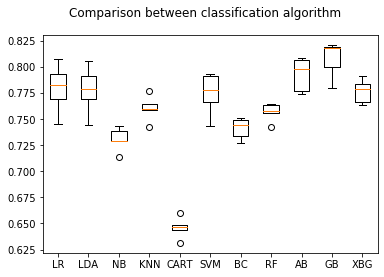

In [37]:
# Modulus
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('BC', BaggingClassifier(base_estimator = DecisionTreeClassifier())))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XBG', XGBClassifier()))

# Lists for names and results
names = []
results = []

# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, trainDF_6.iloc[:,:-1], trainDF_6.iloc[:,-1], 
                                 cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# ROC score boxplots
fig = plt.figure()
fig.suptitle('Comparison between classification algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

With any otimization, the boosting methods reached the higher values in realtion to the other.

In [38]:
# Models with the more significant correlated variables, 
# being V1, V17, and V2

# List for the results
results = []

# Selected independent variables
X = trainDF_6.iloc[:, [0, 16, 1]]
# Dependent variable
Y = trainDF_6.iloc[:,-1]


# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.743296 (0.021828)
LDA: 0.743212 (0.021919)
NB: 0.744172 (0.022255)
KNN: 0.755274 (0.009019)
CART: 0.648411 (0.007528)
SVM: 0.737884 (0.024066)
BC: 0.730232 (0.009452)
RF: 0.749533 (0.007934)
AB: 0.785070 (0.015006)
GB: 0.793200 (0.016656)
XBG: 0.778743 (0.012893)


In [39]:
# Models with the more significant correlated variables, 
# being V1, V17, V2, V16, and V21

# List for the results
results = []

# Selected independent variables
X = trainDF_6.iloc[:, [0, 16, 1, 15, 20]]
# Dependent variable
Y = trainDF_6.iloc[:,-1]


# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.766905 (0.018860)
LDA: 0.766779 (0.019026)
NB: 0.761687 (0.019613)
KNN: 0.762452 (0.012955)
CART: 0.658743 (0.008237)
SVM: 0.774167 (0.018744)
BC: 0.740879 (0.005708)
RF: 0.759100 (0.010685)
AB: 0.793878 (0.015754)
GB: 0.804080 (0.017418)
XBG: 0.781369 (0.019258)


In [40]:
# Models with the more significant correlated variables, 
# being V1, V17, V2, V16, V21, V30, V7, V23, and V3

# List for the results
results = []

# Selected independent variables
X = trainDF_6.iloc[:, [0, 16, 1, 15, 20, 29, 6, 22, 2]]
# Dependent variable
Y = trainDF_6.iloc[:,-1]


# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.774970 (0.020224)
LDA: 0.774595 (0.020018)
NB: 0.752357 (0.015349)
KNN: 0.760262 (0.012259)
CART: 0.644237 (0.015554)
SVM: 0.780640 (0.019325)
BC: 0.735003 (0.008973)
RF: 0.756038 (0.009129)
AB: 0.794937 (0.013867)
GB: 0.805757 (0.019659)
XBG: 0.779955 (0.018604)


The variable selection by correlation coefficient did not transform in better result. The boosting algothms were the best one.

In [41]:
# Feature selection with SelectKBest and F classifier

# Modulus
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Dependent variable
Y = trainDF_6.iloc[:,-1]
# Indepent variables
X = trainDF_6.iloc[:,:-1]

# Feature selection function
best_var = SelectKBest(score_func = f_classif, k = 9)

# Best selection application
fit = best_var.fit(X, Y)

# Selected features
X_best = fit.transform(X)

In [42]:
# Dataframe of the reduced dataset
trainDF_7 = df(X_best, Y, trainDF_6)
trainDF_7

,V1,V2,V3,V4,V5,V6,V7,V8,V9,TARGET
ID,,,,,,,,,,
36,-1.526378,0.560386,-0.260441,-0.055351,-0.068057,0.108961,0.012198,-0.025960,0.003357,0
77,-1.247681,0.549131,0.057972,-0.063564,-0.160449,0.247159,0.072689,-0.046373,0.001791,1
135,0.565872,-0.461638,-0.045898,-0.663563,-0.059143,0.024486,0.010930,0.003535,-0.015701,0
159,1.871179,1.479477,-0.491101,-0.500927,-0.127280,-0.086960,-0.037919,-0.009428,-0.009979,1
212,-1.277234,0.532981,-0.008301,-0.049228,0.220692,0.030196,-0.041147,0.003141,-0.007309,0
...,...,...,...,...,...,...,...,...,...,...
151644,-0.323007,-0.405568,-0.621038,0.475117,-0.011998,-0.041784,-0.003442,0.003649,0.003714,0
151679,-1.256060,0.537302,0.024083,-0.055642,0.000195,-0.059406,-0.018109,0.003883,-0.000973,1
151775,0.487860,1.592299,0.329700,-0.080906,0.005789,0.050232,-0.026643,-0.021797,-0.079027,0


In [43]:
# Boosting methods with feature selection

# Model list
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XBG', XGBClassifier()))

# Lists for names and results
names = []
results = []

# Dependent variable
Y = trainDF_7.iloc[:,-1]
# Indepent variables
X = trainDF_7.iloc[:,:-1]


# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.794937 (0.013867)
GB: 0.805679 (0.019829)
XBG: 0.782365 (0.016256)


In [44]:
# Feature selection with the Recursive Feature Elimination (RFE)

# Modulus
from sklearn.feature_selection import RFE

# Dependent variable
Y = trainDF_6.iloc[:,-1]
# Indepent variables
X = trainDF_6.iloc[:,:-1]

# Model
model = GradientBoostingClassifier()

# RFE
rfe = RFE(model, 9)
fit = rfe.fit(X, Y)

# Selected features
X_best = fit.transform(X)

In [45]:
# Dataframe of the reduced dataset
trainDF_8 = df(X_best, Y, trainDF_6)
trainDF_8

,V1,V2,V3,V4,V5,V6,V7,V8,V9,TARGET
ID,,,,,,,,,,
36,-1.526378,0.560386,-0.260441,-0.055351,-0.068057,0.108961,0.012198,-0.025960,0.001016,0
77,-1.247681,0.549131,0.057972,-0.063564,-0.160449,0.247159,0.072689,-0.046373,-0.003418,1
135,0.565872,-0.461638,-0.045898,-0.663563,-0.059143,0.024486,0.010930,0.003535,-0.004030,0
159,1.871179,1.479477,-0.491101,-0.500927,-0.127280,-0.086960,-0.037919,-0.009428,0.000404,1
212,-1.277234,0.532981,-0.008301,-0.049228,0.220692,0.030196,-0.041147,0.003141,-0.002784,0
...,...,...,...,...,...,...,...,...,...,...
151644,-0.323007,-0.405568,-0.621038,0.475117,-0.011998,-0.041784,-0.003442,0.003649,0.001473,0
151679,-1.256060,0.537302,0.024083,-0.055642,0.000195,-0.059406,-0.018109,0.003883,0.000148,1
151775,0.487860,1.592299,0.329700,-0.080906,0.005789,0.050232,-0.026643,-0.021797,-0.012614,0


In [46]:
# Boosting methods with feature selection

# Model list
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XBG', XGBClassifier()))

# Lists for names and results
names = []
results = []

# Dependent variable
Y = trainDF_8.iloc[:,-1]
# Indepent variables
X = trainDF_8.iloc[:,:-1]


# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.795822 (0.013850)
GB: 0.804958 (0.017558)
XBG: 0.778745 (0.016385)


In [47]:
# Feature selection with Extra Trees Classifier

# Modulus
from sklearn.ensemble import ExtraTreesClassifier

# Dependent variable
Y = trainDF_6.iloc[:,-1]
# Indepent variables
X = trainDF_6.iloc[:,:-1]

# Model
model = ExtraTreesClassifier()
model.fit(X, Y)

# Results
print(X.columns)
imp = model.feature_importances_
print(imp)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31'],
      dtype='object')
[0.05690576 0.05487501 0.03470531 0.03414119 0.02588151 0.03101325
 0.02494644 0.02952844 0.0247274  0.02352538 0.02592023 0.03318941
 0.03328209 0.02757083 0.02808713 0.04555074 0.04783373 0.03315258
 0.02489069 0.03039241 0.03607596 0.02624733 0.04624963 0.02416998
 0.02662308 0.03015473 0.02788915 0.029246   0.03169926 0.02684294
 0.02468243]


In [48]:
# Boosting methods with feature selection

# Model list
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XBG', XGBClassifier()))

# Lists for names and results
names = []
results = []

# Dependent variable
Y = trainDF_6.iloc[:,-1]
# Indepent variables
imp_X = X.iloc[:, imp > 0.03]

# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, imp_X, Y, cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.797758 (0.014805)
GB: 0.805103 (0.015996)
XBG: 0.775783 (0.018222)


The automatic feature selection did not improve the results, they got stuck.

The parameter optimization of the models will be done in the last step.

The work will return to the trainDF_3 and trainDF_4 datasets, those compose the complete dataset before the PCA application. It is normalized and is not down-sampled.

In [49]:
# Boosting methods with the complete dataset

# Model list
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XBG', XGBClassifier()))

# Lists for names and results
names = []
results = []

# Dependent variable
Y = trainDF_3.iloc[:,-1]
# Indepent variables
X = trainDF_4

# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.823678 (0.004954)
GB: 0.832809 (0.008120)
XBG: 0.819498 (0.007826)


The results are better than all attempts with the PCA dataset.

In [50]:
# Feature selection with SelectKBest and F classifier
# Feature selection with Extra Trees Classifier

# Boosting method with feature selection
model = GradientBoostingClassifier()

results = []
for i in range(10, X.shape[1], 10):

    # SelectKBest model
    sb = SelectKBest(score_func = f_classif, k = i)
    # ETC model
    etc = ExtraTreesClassifier(n_estimators = i)

    # Best selection application
    fit_sb  =  sb.fit(X, Y)
    fit_etc = etc.fit(X, Y)

    # Selected features
    X_sb = fit_sb.transform(X)
    imp = fit_etc.feature_importances_
    X_etc = X.iloc[:, imp > 0.03]

    # Roc score evaluation
    cv_results_sb  = cross_val_score(model,  X_sb, Y, cv = 5, scoring = 'roc_auc')
    cv_results_etc = cross_val_score(model, X_etc, Y, cv = 5, scoring = 'roc_auc')

    # Result lists
    results.append((i, cv_results_sb.mean(), cv_results_etc.mean()))
    print(results[-1])

(10, 0.8007276905959122, 0.7270934458954205)
(20, 0.8193947153436201, 0.7270936536550712)
(30, 0.8212680274974478, 0.7270952377927461)
(40, 0.8238792702668715, 0.7270944326991833)
(50, 0.8259107472006655, 0.7270940171836786)
(60, 0.8262352310777287, 0.7270963543331005)
(70, 0.8262156828434606, 0.7270934718613427)
(80, 0.8327805706321735, 0.7270941989755085)
(90, 0.8338564683685135, 0.7270940950928357)
(100, 0.8331463940534058, 0.7270951598968777)
(110, 0.8328112677835785, 0.7270940172292395)
(120, 0.8337198347608361, 0.7270939392745215)
(130, 0.8334634850120896, 0.7270937834979712)
(140, 0.833290263022241, 0.7270962763802806)


In [51]:
# Maximum value of the list results
from operator import itemgetter 

res = max(results, key = itemgetter(1))
res

(90, 0.8338564683685135, 0.7270940950928357)

The maximum precision occurs with the SB model and 90 estimator,

In [52]:
# Boosting methods with the complete dataset and SelectedKBest model

# SelectKBest model
sb = SelectKBest(score_func = f_classif, k = res[0])

# Best selection application
fit_sb  =  sb.fit(X, Y)

# Selected features
X_sb = fit_sb.transform(X)

# Boosting method
model = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.05)

# Roc score evaluation
cv_results  = cross_val_score(model, X_sb, Y, 
                              cv = 5, scoring = 'roc_auc')
print('GB', cv_results.mean(), cv_results.std())

GB 0.8317674631498247 0.007682925340291258


It will attempt the down sample again, but without the PCA method.

In [53]:
# Appling the down sample
trainDF_9 = pd.concat([X,Y], axis = 1)
trainDF_9 = down_major_class(trainDF_9)
trainDF_9

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
14,0.999764,0.22,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.004076,0
23,0.999764,0.20,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.015947,0
51,0.999764,0.30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000009,0.0,0.00001,0.000013,0.0,0.0,0.0,0.0,0.005091,0
77,0.999764,0.61,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.002640,1
106,0.999764,0.18,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.006812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151731,0.999764,0.24,0.0,0.018168,0.023989,0.018168,0.030444,0.005219,0.006407,0.009962,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.005091,0
151801,0.999764,0.62,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.002292,0
151804,0.999764,0.70,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.005091,1


In [54]:
# Boosting methods with the reduced dataset

# Model list
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XBG', XGBClassifier()))

# Lists for names and results
names = []
results = []

# Dependent variable
Y = trainDF_9.iloc[:,-1]
# Indepent variables
X = trainDF_9.iloc[:,:-1]

# Roc score evaluation
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv = 5, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.826675 (0.005310)
GB: 0.839404 (0.006202)
XBG: 0.819713 (0.008249)


In [55]:
# Feature selection with SelectKBest and F classifier
# Feature selection with the Recursive Feature Elimination (RFE)
# Feature selection with Extra Trees Classifier

# Dependent variable
Y = trainDF_9.iloc[:,-1]
# Indepent variables
X = trainDF_9.iloc[:,:-1]

# Boosting method with feature selection
model = GradientBoostingClassifier()

results = []
for i in range(10, trainDF_9.shape[1]):

    # SelectKBest model
    sb = SelectKBest(score_func = f_classif, k = i)
    # RFE model
#    rfe = RFE(model, n_features_to_select = 80)
    # ETC model
    etc = ExtraTreesClassifier(n_estimators = i)

    # Best selection application
    fit_sb  =  sb.fit(X, Y)
#    fit_rfe = rfe.fit(X, Y)
    fit_etc = etc.fit(X, Y)

    # Selected features
    X_sb = fit_sb.transform(X)
#    X_rfe = fit_rfe.transform(X) 
    imp = fit_etc.feature_importances_
    X_etc = X.iloc[:, imp > 0.03]

    # Roc score evaluation
    cv_results_sb  = cross_val_score(model,  X_sb, Y, cv = 5, scoring = 'roc_auc')
#    cv_results_rfe = cross_val_score(model, X_rfe, Y, cv = 5, scoring = 'roc_auc')
    cv_results_etc = cross_val_score(model, X_etc, Y, cv = 5, scoring = 'roc_auc')

    # Result lists
    results.append((i, cv_results_sb.mean(), cv_results_etc.mean()))
#    results_rfe.append(cv_results_rfe.mean())
    print(results[-1])

(10, 0.8030428843199179, 0.8065927582823557)
(11, 0.8034009635011626, 0.793336887834457)
(12, 0.822000574188643, 0.7983802832453646)
(13, 0.8209376942224633, 0.7985938688010499)
(14, 0.8209484208234874, 0.8147298316239127)
(15, 0.8209982679694228, 0.8066142114844037)
(16, 0.8214336417756941, 0.7968233486555467)
(17, 0.8220460044988627, 0.8097586830257848)
(18, 0.8218545031217565, 0.811037672453773)
(19, 0.8218292640605233, 0.8066104256252189)
(20, 0.821717581214567, 0.7967457385422549)
(21, 0.821980698427922, 0.8085226000018931)
(22, 0.8216961280125187, 0.8084689669967726)
(23, 0.8216582694206689, 0.8084967299641288)
(24, 0.8214765481797904, 0.8084882117809628)
(25, 0.8214588808369271, 0.7974186750123828)
(26, 0.8213254293006571, 0.8068085522558988)
(27, 0.8216062138568756, 0.8066161044139963)
(28, 0.8216715199278163, 0.8096813884007584)
(29, 0.8213796932823083, 0.7968448018575949)
(30, 0.8214506781420265, 0.8066154734374654)
(31, 0.8217267303742638, 0.8084891582457591)
(32, 0.82145288

In [56]:
# Maximum value of the list results
from operator import itemgetter 

print('The best precision of the SB method:', max(results, key = itemgetter(1))[1])  
print('Number of estimators:', max(results, key = itemgetter(1))[0])
print('\n')
print('The best precision of the ETC method:', max(results, key = itemgetter(2))[2])
print('Number of estimators:', max(results, key = itemgetter(2))[0])

The best precision of the SB method: 0.8394029069088775
Number of estimators: 145


The best precision of the ETC method: 0.8147298316239127
Number of estimators: 14


The maximum value has the 148 estimators. The dataset did not reduced.

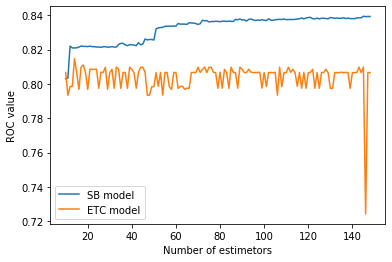

In [57]:
# Graphic
n_estimators = [a for a,b,c in results]
sb_values = [b for a,b,c in results]
etc_values = [c for a,b,c in results]

plt.plot(n_estimators, sb_values, label = 'SB model')
plt.plot(n_estimators, etc_values, label = 'ETC model')
plt.xlabel('Number of estimetors')
plt.ylabel('ROC value')
plt.legend()
plt.show()

But after approximatelly k = 80 in the SB model, the ROC value is almost constant.

In [58]:
# Boosting method with feature selection

# Dependent variable
Y = trainDF_9.iloc[:,-1]
# Indepent variables
X = trainDF_9.iloc[:,:-1]

# Model
model = GradientBoostingClassifier()

# Roc score evaluation
cv_results  = cross_val_score(model, X, Y, 
                              cv = 5, scoring = 'roc_auc')
print('REFERENCE: GB', cv_results.mean(), cv_results.std())

REFERENCE: GB 0.8391912142827846 0.006149776948971931


In [59]:
# Boosting method with feature selection
model = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.05)

# Roc score evaluation
cv_results  = cross_val_score(model, X, Y, 
                              cv = 5, scoring = 'roc_auc')
print('GB', cv_results.mean(), cv_results.std())

GB 0.838464329319271 0.006480537112093433


#### The last attempt

In [60]:
def sum_var(name):
    V_names = list(filter(lambda x: x[:len(name)] == name, trainDF_9.columns))
    V_sum = trainDF_9[V_names].sum(axis = 1)
    return V_sum

In [61]:
names = ['delta', 'imp', 'ind', 'num', 'saldo', 'var']
trainDF_10 = pd.DataFrame(index = trainDF_9.index)
for name in names:
    trainDF_10 = pd.concat([trainDF_10, pd.Series(sum_var(name), name = name)], axis = 1)

In [62]:
# Normalization
scaler = MinMaxScaler(feature_range = (0, 1))
trainDF_11 = scaler.fit_transform(trainDF_10)

In [63]:
trainDF_11 = pd.DataFrame(trainDF_11, index = trainDF_10.index, columns = trainDF_10.columns)
trainDF_11 = pd.concat([trainDF_11, trainDF_9.iloc[:,-1]], axis = 1)
trainDF_11

,delta,imp,ind,num,saldo,var,TARGET
ID,,,,,,,
14,1.000000e-10,0.000000,0.153846,0.214198,0.001865,0.371926,0
23,1.000000e-10,0.000000,0.076923,0.120622,0.001865,0.365272,0
51,1.000000e-10,0.000000,0.307692,0.418252,0.001892,0.397810,0
77,1.000000e-10,0.000000,0.076923,0.080878,0.001861,0.867702,1
106,1.000000e-10,0.000000,0.076923,0.147015,0.001865,0.712272,0
...,...,...,...,...,...,...,...
151731,1.000000e-10,0.033693,0.153846,0.400810,0.005527,0.375909,0
151801,1.000000e-10,0.000000,0.076923,0.080878,0.001861,0.871225,0
151804,1.000000e-10,0.000003,0.192308,0.210428,0.002038,0.540126,1


In [64]:
# Boosting method with feature selection

# Dependent variable
Y = trainDF_11.iloc[:,-1]
# Indepent variables
X = trainDF_11.iloc[:,:-1]

# Model
model = GradientBoostingClassifier()

# Roc score evaluation
cv_results  = cross_val_score(model, X, Y, 
                              cv = 5, scoring = 'roc_auc')
print('REFERENCE: GB', cv_results.mean(), cv_results.std())

REFERENCE: GB 0.8143648117008286 0.006364317292357324


### Conclusion

The higher precision happened in the penultimate attempt, where 83.5% of precision was obtained. Its dataset was compiled after rare value elimination, down-sample of the major class, and the Gradient Boosting Classifier hyperparameter optimization.

As an improvement for the next problems, it needed to invest more time in the dataset preprocessing.

The next step is to apply to the test dataset,

In [66]:
# Saving the best dataset to predict
trainDF_9.to_csv('trainDF_9.csv')